#Animations
This jupyter notebook serves to animate the solution to a system of Lorenz equations with chosen initial values. (Note, it takes around 1 hour to fully animate the solution)

In [1]:
#@title
r = int(float(input('r?')))
x = int(float(input('x?')))
y = int(float(input('y?')))
z = int(float(input('z?')))

r?12
x?5
y?-5
z?-5


In [2]:
#@title
! pip install diffrax

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.7/113.7 KB 5.9 MB/s eta 0:00:00


In [3]:
import time
from diffrax import diffeqsolve, ODETerm, Kvaerno5, SaveAt, PIDController
import equinox as eqx
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [4]:
jax.config.update("jax_enable_x64", True)

In [5]:
class Lorenz(eqx.Module):
    s: float
    b: float
    r: float

    def __call__(self, t, y, args):
        f0 = self.s * (y[1] - y[0])
        f1 = self.r * y[0] - y[1] - y[0] * y[2]
        f2 = y[0] * y[1] - self.b * y[2]
        return jnp.stack([f0, f1, f2])

In [6]:
t0 = 0.0
t1 = 50.0
y0 = jnp.array([x, y, z])

In [7]:
@jax.jit
def main(s, b, r):
    lorenz = Lorenz(s, b, r)
    terms = ODETerm(lorenz)
    dt0 = 0.000001
    solver = Kvaerno5()
    saveat = SaveAt(ts=jnp.linspace(t0, t1, 100000))
    stepsize_controller = PIDController(rtol=1e-8, atol=1e-8)
    sol = diffeqsolve(
        terms,
        solver,
        t0,
        t1,
        dt0,
        y0,
        max_steps=100000,
        saveat=saveat,
        stepsize_controller=stepsize_controller,
    )
    return sol

Do and time one iteration to JIT compile everything. Then time the second iteration.

In [8]:
comp_start = time.time()
main(10.0, 8.0/3.0, r)
comp_end = time.time()

start = time.time()
sol = main(10.0, 8.0/3.0, r)
end = time.time()

print(f"Compiling and solving took {comp_end - comp_start} seconds.")
print(f"Solving while compiled took {sol.stats['num_steps']} steps in {end - start} seconds.")

Compiling and solving took 20.09023666381836 seconds.
Solving while compiled took 710 steps in 4.168704509735107 seconds.


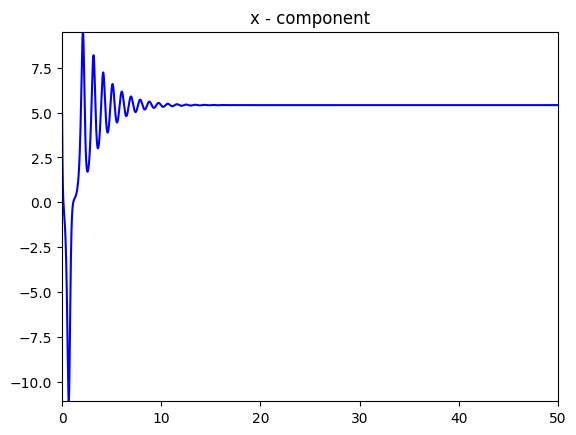

In [9]:
figx = plt.figure()
axi = figx.add_subplot(111, xlim=(0, t1), 
                ylim=(jnp.min(sol.ys[:, 0]), jnp.max(sol.ys[:,0])))
plt.plot(sol.ts, sol.ys[:, 0], 'b')
plt.title('x - component')
plt.show()

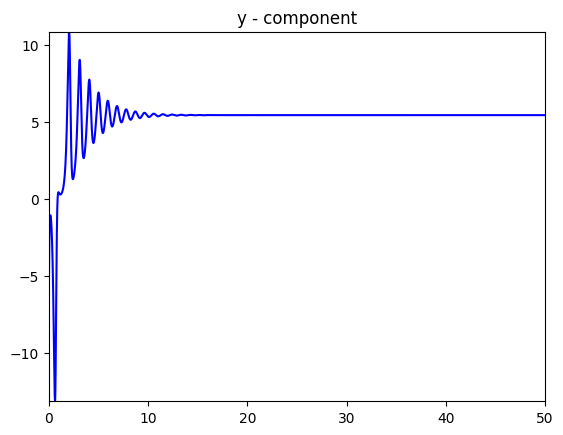

In [10]:
figy = plt.figure()
axi = figy.add_subplot(111, xlim=(0, t1), 
                ylim=(jnp.min(sol.ys[:, 1]), jnp.max(sol.ys[:, 1])))
plt.plot(sol.ts, sol.ys[:, 1], 'b')
plt.title('y - component')
plt.show()

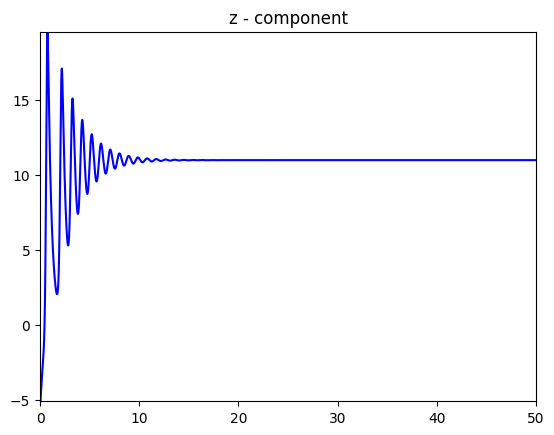

In [11]:
figz = plt.figure()
axi = figz.add_subplot(111, xlim=(0, t1), 
                ylim=(jnp.min(sol.ys[:, 2]), jnp.max(sol.ys[:,2])))
plt.plot(sol.ts, sol.ys[:, 2], 'b')
plt.title('z - component')
plt.show()

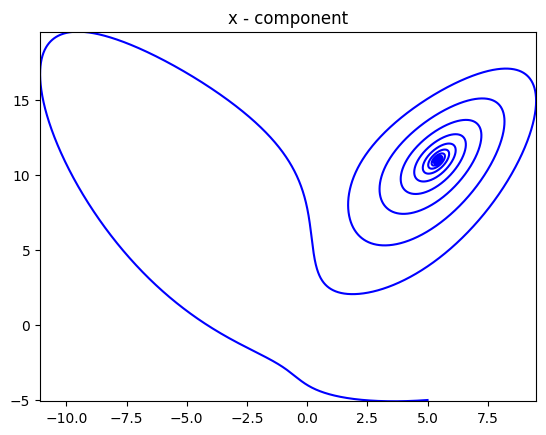

In [12]:
figxz = plt.figure()
axi = figxz.add_subplot(111,
                xlim=(jnp.min(sol.ys[:, 0]), jnp.max(sol.ys[:,0])),
                ylim=(jnp.min(sol.ys[:, 2]), jnp.max(sol.ys[:,2])))
plt.plot(sol.ys[:, 0], sol.ys[:, 2], 'b')
plt.title('x - component')
plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

In [14]:
dataSet = np.array([sol.ys[:, 0], sol.ys[:, 1], sol.ys[:, 2]])

In [15]:
def animate_func(num):
    ax.clear()  
    
    ax.plot3D(dataSet[0, :num+1], dataSet[1, :num+1], 
              dataSet[2, :num+1], c='blue')
    
    ax.scatter(dataSet[0, num], dataSet[1, num], dataSet[2, num], 
               c='blue', marker='o')
    
    ax.plot3D(dataSet[0, 0], dataSet[1, 0], dataSet[2, 0],     
               c='black', marker='o')
    
    ax.set_xlim3d([jnp.min(sol.ys[:, 0]), jnp.max(sol.ys[:, 0])])
    ax.set_ylim3d([jnp.min(sol.ys[:, 1]), jnp.max(sol.ys[:, 1])])
    ax.set_zlim3d([jnp.min(sol.ys[:, 2]), jnp.max(sol.ys[:, 2])])

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

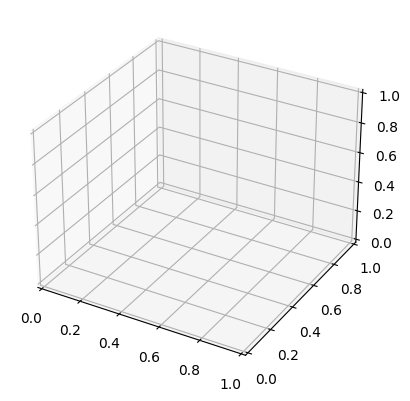

In [16]:
fig = plt.figure()
ax = plt.axes(projection='3d')
anima = animation.FuncAnimation(fig, animate_func, interval=2, 
                                   frames=5000)
plt.show()

In [ ]:
from IPython.display import HTML
HTML(anima.to_html5_video())